# Package: GluonTS

<img src="https://camo.githubusercontent.com/cd9fbc43a905ba95f0326815c988c72dae1f53f4006beffdc4c4153de486c975/68747470733a2f2f74732e676c756f6e2e61692f6465762f5f7374617469632f676c756f6e74732e737667" alt="GluonTS" style="width: 30%; margin-right: 20px; border-radius: 10px;">

## First Example

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split 
from gluonts.torch import DeepAREstimator


/Users/cls/miniforge3/envs/dslp-tsf/lib/python3.12/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [3]:
# Load data from a CSV file into a PandasDataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/AileenNielsen/"
    "TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv",
    index_col=0,
    parse_dates=True,
)
dataset = PandasDataset(df, target="#Passengers")
dataset


PandasDataset<size=1, freq=M, num_feat_dynamic_real=0, num_past_feat_dynamic_real=0, num_feat_static_real=0, num_feat_static_cat=0, static_cardinalities=[]>

In [4]:
# Split the data for training and testing
training_data, test_gen = split(dataset, offset=-36)
test_data = test_gen.generate_instances(prediction_length=12, windows=3)


In [6]:
# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=12,
    freq="M",
    trainer_kwargs={"max_epochs": 5, "accelerator": "cpu"},
).train(training_data)


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/cls/miniforge3/envs/dslp-tsf/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.

  | Name  | Type        | Params | Mode  | In sizes                                                   | Out sizes   
--------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 23.3 K | train | [[1, 1], [1, 1], [1, 48, 2], [1, 48], [1, 48], [1, 12, 2]] | [1, 100, 12]
--------------------------------------------------------------------------------------------------------------------------
23.3 K    Trainable params
0         Non-trainable params
23.3 K    Total params
0.093     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Epoch 0: |          | 50/? [00:00<00:00, 72.58it/s, v_num=1, train_loss=5.870]

Epoch 0, global step 50: 'train_loss' reached 5.87072 (best 5.87072), saving model to '/Users/cls/Documents/Work/Training/point8/data-science-learning-paths/notebooks/timeseries/lightning_logs/version_1/checkpoints/epoch=0-step=50.ckpt' as top 1


Epoch 1: |          | 50/? [00:00<00:00, 82.65it/s, v_num=1, train_loss=4.800]

Epoch 1, global step 100: 'train_loss' reached 4.80319 (best 4.80319), saving model to '/Users/cls/Documents/Work/Training/point8/data-science-learning-paths/notebooks/timeseries/lightning_logs/version_1/checkpoints/epoch=1-step=100.ckpt' as top 1


Epoch 2: |          | 50/? [00:00<00:00, 77.49it/s, v_num=1, train_loss=4.500]

Epoch 2, global step 150: 'train_loss' reached 4.50422 (best 4.50422), saving model to '/Users/cls/Documents/Work/Training/point8/data-science-learning-paths/notebooks/timeseries/lightning_logs/version_1/checkpoints/epoch=2-step=150.ckpt' as top 1


Epoch 3: |          | 50/? [00:00<00:00, 82.00it/s, v_num=1, train_loss=4.350]

Epoch 3, global step 200: 'train_loss' reached 4.34816 (best 4.34816), saving model to '/Users/cls/Documents/Work/Training/point8/data-science-learning-paths/notebooks/timeseries/lightning_logs/version_1/checkpoints/epoch=3-step=200.ckpt' as top 1


Epoch 4: |          | 50/? [00:00<00:00, 78.37it/s, v_num=1, train_loss=4.190]

Epoch 4, global step 250: 'train_loss' reached 4.18728 (best 4.18728), saving model to '/Users/cls/Documents/Work/Training/point8/data-science-learning-paths/notebooks/timeseries/lightning_logs/version_1/checkpoints/epoch=4-step=250.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: |          | 50/? [00:00<00:00, 77.83it/s, v_num=1, train_loss=4.190]


/Users/cls/miniforge3/envs/dslp-tsf/lib/python3.12/site-packages/gluonts/time_feature/lag.py:104: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = to_offset(freq_str)


In [7]:
forecasts = list(model.predict(test_data.input))


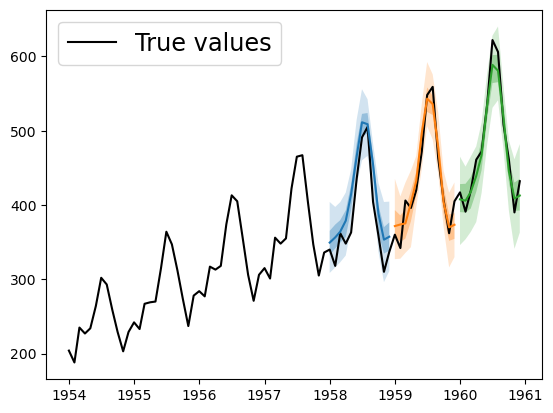

In [8]:
# Plot predictions
plt.plot(df["1954":], color="black")
for forecast in forecasts:
    forecast.plot()
plt.legend(["True values"], loc="upper left", fontsize="xx-large")
plt.show()

---
_This notebook is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/). Copyright © 2018-2024 [Point 8 GmbH](https://point-8.de)_